# calculates the CEI and determine the category of each season (3m running averages for the SOI, 5m running averages for NINO3.4)

### [Nicolas Fauchereau](mailto:Nicolas.Fauchereau@niwa.co.nz)

In [70]:
%matplotlib inline
from matplotlib import pyplot as plt

In [71]:
import sys

In [72]:
import pandas as pd
import numpy as np
import requests
import urllib.request, urllib.error, urllib.parse
from dateutil import parser as dparser
from datetime import datetime, timedelta
import subprocess

In [73]:
clim_start = 1981
clim_end = 2010

In [74]:
def get_BOM_MSLP(station='tahiti'):
    url = "ftp://ftp.bom.gov.au/anon/home/ncc/www/sco/soi/{}mslp.html".format(station)
    req = urllib.request.Request(url)

    r = urllib.request.urlopen(req)

    data = r.read()

    data = data.splitlines()

    fout = open('./{}_text'.format(station), 'w')
    if station == 'tahiti':
        data = data[15:-1]
    else:
        data = data[14:-1]
    data = [x.decode('utf-8') for x in data]
    data = [x+'\n' for x in data]
    fout.writelines(data)
    fout.close()
    data = pd.read_table('./{}_text'.format(station),sep='\s+', engine='python', na_values='*', index_col=['Year'])
    subprocess.Popen(["rm {}*".format(station)], shell=True, stdout=True).communicate()
    return(data)

In [75]:
# urllib2proxy = urllib.request.ProxyHandler(proxies)
# opener = urllib.request.build_opener(urllib2proxy)
# urllib.request.install_opener(opener)

### get TAHITI MSLP

In [76]:
tahitidf = get_BOM_MSLP(station='tahiti')

In [77]:
tahitidf.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2019,1011.1,1010.7,1011.1,1012.3,1012.8,1013.7,1014.3,1015.3,1014.8,1013.4,1011.2,1010.8
2020,1011.9,1011.5,1012.1,1012.8,1014.4,1012.9,1014.3,1015.7,1015.7,1013.6,1013.3,1013.3
2021,1013.5,1012.0,1012.0,1012.3,1013.4,1014.6,1015.7,1015.7,1015.9,1013.7,1013.1,1012.7
2022,1011.8,1013.2,1014.0,1013.6,1014.3,1015.5,1015.4,1015.3,1016.7,1015.1,1012.2,1013.0
2023,1012.9,1012.1,1012.0,1011.5,1012.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### get DARWIN MSLP

In [78]:
darwindf = get_BOM_MSLP(station='darwin')

In [79]:
darwindf.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2019,1006.8,1009.0,1008.4,1010.1,1012.3,1013.8,1014.2,1014.3,1014.5,1011.4,1009.7,1008.4
2020,1007.2,1007.4,1009.1,1010.5,1012.4,1012.9,1012.7,1012.5,1011.6,1010.0,1009.0,1006.5
2021,1005.6,1005.0,1008.1,1009.7,1011.3,1013.1,1012.3,1013.3,1012.0,1009.7,1008.3,1006.5
2022,1006.5,1006.9,1007.5,1008.5,1010.4,1011.7,1013.1,1012.2,1011.3,1009.3,1008.6,1005.6
2023,1006.0,1005.3,1008.4,1009.1,1013.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
"""
climatological period
"""
clim_start = clim_start
clim_end = clim_end
clim = "{}_{}".format(clim_start, clim_end)

### calculates the SOI according to the Troup (1965) method

If T and D are the monthly pressures at Tahiti and Darwin, respectively, and Tc and Dc the climatological monthly pressures, then: 
```
SOI    =   [ (T – Tc) – (D – Dc) ]  /  [ StDev (T – D)  ]
```

The reference is: 

**Troup, A.J,, 1965: The Southern Oscillation. Quarterly Journal of Royal Meteorological
Society 91, 490-506.**

In [81]:
### ==============================================================================================================
tahiti_cli = tahitidf.loc[clim_start:clim_end,:]
darwin_cli = darwindf.loc[clim_start:clim_end,:]

tahiti_mean = tahiti_cli.mean(0)
darwin_mean = darwin_cli.mean(0)
### ==============================================================================================================

### ==============================================================================================================
### Step 3: calculate the SOI
soi = ((tahitidf - tahiti_mean) - (darwindf - darwin_mean)) / ((tahiti_cli -  darwin_cli).std(0))

In [82]:
soi.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1876,1.022749,0.989125,0.377561,0.927624,0.963654,2.121875,-0.481909,1.461516,0.961180,-0.591596,-0.259023,-0.246954
1877,-0.799152,-0.369698,-0.059956,-0.454796,0.655285,-1.314581,-0.959272,-0.498059,-1.624450,-1.321730,-1.135417,-1.143538
1878,-0.716338,-1.508170,-1.032216,-0.394691,0.501100,0.076366,1.768516,1.522753,1.635692,1.149493,1.318485,1.687780
1879,1.146969,1.246199,1.544273,1.168045,0.501100,2.040055,2.382268,2.441304,1.748110,1.542643,0.851076,-0.482897
1880,0.981342,0.732050,1.641499,0.627098,1.503301,1.303671,0.268232,1.645226,0.736342,0.587852,0.617371,-0.152577


In [83]:
### stack everything vertically and add a proper datetime index
ts_soi = pd.DataFrame(soi.stack())

dates = []
for i in range(len(ts_soi)):
    dates.append(dparser.parse("{}-{}-1".format(ts_soi.index.get_level_values(0)[i], ts_soi.index.get_level_values(1)[i])))

ts_soi.index = dates
ts_soi.columns = ['soi']

In [84]:
ts_soi.tail()

,soi
2023-01-01,1.064156
2023-02-01,0.952400
2023-03-01,0.183109
2023-04-01,0.266467
2023-05-01,-1.503301


### keep 1950 onwards only

In [85]:
ts_soi = ts_soi.loc['1948':]

In [86]:
ts_soi.head()

,soi
1948-01-01,-0.219456
1948-02-01,-0.075898
1948-03-01,-0.011343
1948-04-01,0.446782
1948-05-01,0.655285


In [87]:
ts_soi.loc[:,'soi3m'] = ts_soi.rolling(window=3, min_periods=3).mean()

In [35]:
ts_soi.head()

,soi,soi3m
1948-01-01,-0.219456,NaN
1948-02-01,-0.075898,NaN
1948-03-01,-0.011343,-0.102232
1948-04-01,0.446782,0.119847
1948-05-01,0.655285,0.363575


In [36]:
ts_soi.tail()

,soi,soi3m
2023-01-01,1.064156,1.108119
2023-02-01,0.952400,1.297697
2023-03-01,0.183109,0.733221
2023-04-01,0.266467,0.467325
2023-05-01,-1.503301,-0.351242


### Get the NINO 3.4 INDEX, based on the ERSST V5 SST dataset 

In [37]:
NINO_url = 'http://www.cpc.ncep.noaa.gov/data/indices/ersst5.nino.mth.91-20.ascii'

In [38]:
nino = pd.read_csv(NINO_url, sep='\s+', engine='python')

In [39]:
nino.columns

Index(['YR', 'MON', 'NINO1+2', 'ANOM', 'NINO3', 'ANOM.1', 'NINO4', 'ANOM.2',
       'NINO3.4', 'ANOM.3'],
      dtype='object')

In [40]:
nino.tail()

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
847,2020,8,19.96,-1.05,24.50,-0.60,28.48,-0.17,26.27,-0.57
848,2020,9,19.50,-1.23,23.91,-1.02,28.21,-0.45,25.89,-0.84
849,2020,10,20.25,-0.80,23.85,-1.10,27.96,-0.68,25.46,-1.21
850,2020,11,20.95,-0.75,23.89,-1.15,27.81,-0.75,25.29,-1.33
851,2020,12,22.03,-0.86,24.33,-0.87,27.55,-0.89,25.42,-1.14


In [41]:
nino = nino[['YR','MON','NINO3.4']]

In [42]:
nino.tail()

,YR,MON,NINO3.4
847,2020,8,26.27
848,2020,9,25.89
849,2020,10,25.46
850,2020,11,25.29
851,2020,12,25.42


In [43]:
nino.loc[:,'DAY'] = 1

In [44]:
nino_clim = nino.copy()

In [45]:
nino_clim.index = nino_clim.YR

In [46]:
nino_clim = nino_clim.loc[1981:2010,:]

In [47]:
nino_clim = nino_clim.groupby(nino_clim.MON).mean()

### get a proper datetime index from the `[['YR', 'MON', 'DAY']]` columns

In [48]:
nino.index = nino[['YR', 'MON', 'DAY']].apply(lambda d : datetime(*d), axis = 1)

In [49]:
nino.tail()

,YR,MON,NINO3.4,DAY
2020-08-01,2020,8,26.27,1
2020-09-01,2020,9,25.89,1
2020-10-01,2020,10,25.46,1
2020-11-01,2020,11,25.29,1
2020-12-01,2020,12,25.42,1


### anomalies WRT to the climatology defined above (1981 - 2010)

In [50]:
def demean(x): 
    return x - x.loc[str(clim_start):str(clim_end)].mean()

In [51]:
nino['anoms'] = nino.groupby(nino.MON)[['NINO3.4']].transform(demean)

<AxesSubplot:>

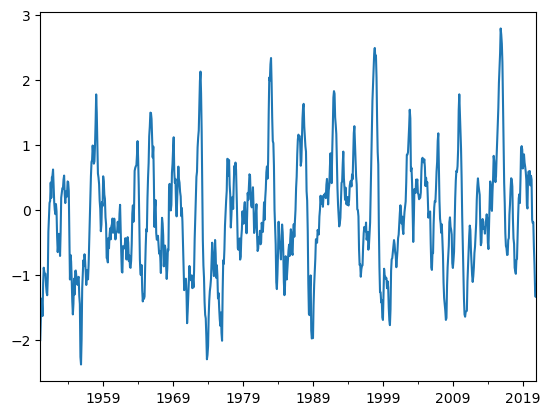

In [52]:
nino.anoms.plot()

In [53]:
ninos = nino[['anoms']]
ninos.columns = ['NINO34']

In [54]:
nino.tail()

,YR,MON,NINO3.4,DAY,anoms
2020-08-01,2020,8,26.27,1,-0.564000
2020-09-01,2020,9,25.89,1,-0.837333
2020-10-01,2020,10,25.46,1,-1.213000
2020-11-01,2020,11,25.29,1,-1.337667
2020-12-01,2020,12,25.42,1,-1.141000


In [55]:
nino['anoms5m'] = nino['anoms'].rolling(window=5, min_periods=5).mean()

<AxesSubplot:>

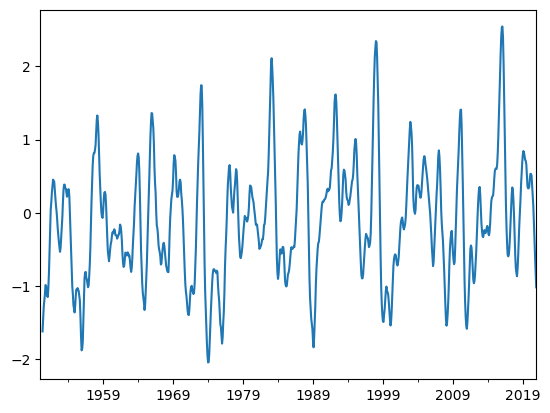

In [56]:
nino.anoms5m.plot()

## Putting it all together 

In [57]:
data = ts_soi[['soi3m']]

In [58]:
data.head()

,soi3m
1948-01-01,NaN
1948-02-01,NaN
1948-03-01,-0.102232
1948-04-01,0.119847
1948-05-01,0.363575


In [59]:
nino.head()

,YR,MON,NINO3.4,DAY,anoms,anoms5m
1950-01-01,1950,1,24.55,1,-2.002333,NaN
1950-02-01,1950,2,25.06,1,-1.681667,NaN
1950-03-01,1950,3,25.87,1,-1.364667,NaN
1950-04-01,1950,4,26.28,1,-1.429667,NaN
1950-05-01,1950,5,26.18,1,-1.632000,-1.622067


In [60]:
data['nino5m'] = nino.loc[:,'anoms5m'].copy()

In [61]:
data.head()

,soi3m,nino5m
1948-01-01,NaN,NaN
1948-02-01,NaN,NaN
1948-03-01,-0.102232,NaN
1948-04-01,0.119847,NaN
1948-05-01,0.363575,NaN


In [62]:
def zscore(x):
    return (x - x.loc[str(clim_start):str(clim_end)].mean()) / x.loc[str(clim_start):str(clim_end)].std()

In [63]:
data = data.apply(zscore)

<AxesSubplot:>

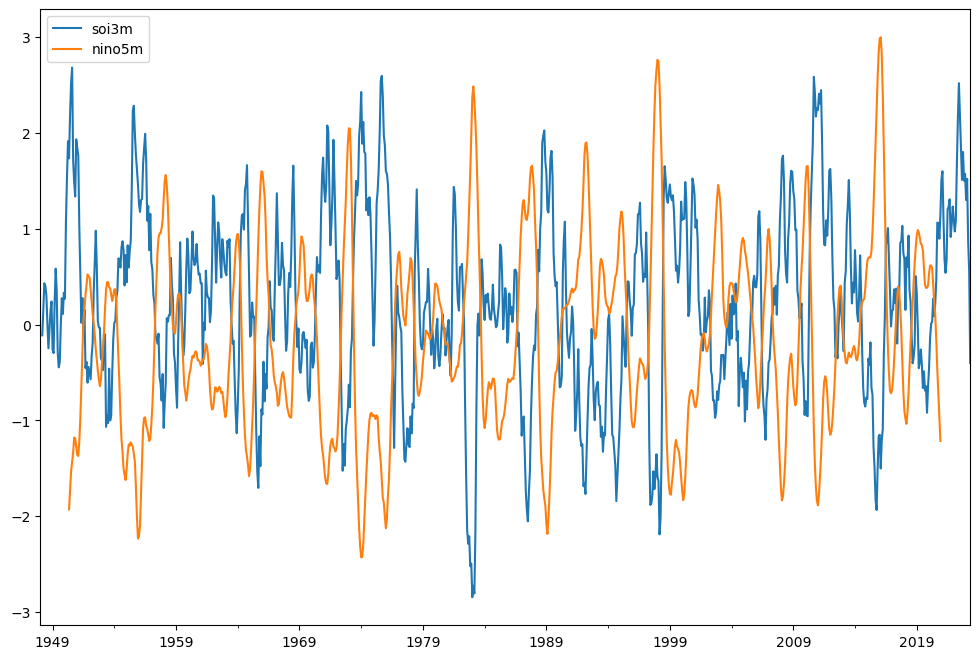

In [64]:
f, ax = plt.subplots(figsize=(12,8))
data.plot(ax=ax)

In [65]:
data.tail()

,soi3m,nino5m
2023-01-01,1.300052,NaN
2023-02-01,1.521183,NaN
2023-03-01,0.862757,NaN
2023-04-01,0.552606,NaN
2023-05-01,-0.402203,NaN


In [66]:
dates  = data.index.to_pydatetime()

In [67]:
dates = [d.toordinal() for d in dates]

### Scatter plot of the SOI values as a function of NINO3.4

In [68]:
# f, ax = plt.subplots()
# ax.scatter(data.nino5m.values, data.soi3m.values, c=dates, edgecolors='none', alpha=0.5)
# ax.axhline(1, c='k', ls=':')
# ax.axhline(-1, c='k', ls=':')
# ax.axvline(0.5, c='k', ls=':')
# ax.axvline(-0.5, c='k', ls=':')
# ax.set_xlim(-4,4)
# ax.set_ylim(-4,4)
# ax.set_xlabel('NINO3.4')
# ax.set_ylabel('SOI')

### CEI calculation:   multiply SOI by -1 and add nino3.4

In [69]:
data.head()

,soi3m,nino5m
1948-01-01,NaN,NaN
1948-02-01,NaN,NaN
1948-03-01,-0.111749,NaN
1948-04-01,0.147294,NaN
1948-05-01,0.431587,NaN


In [54]:
data.loc[:,'CEI'] = (data.loc[:,'soi3m'].values * -1) + data.loc[:,'nino5m'].values

In [55]:
data.head()

,soi3m,nino5m,CEI
1950-01-01,NaN,NaN,NaN
1950-02-01,NaN,NaN,NaN
1950-03-01,1.532001,NaN,NaN
1950-04-01,1.914636,NaN,NaN
1950-05-01,1.734800,-1.928042,-3.662842


<AxesSubplot:>

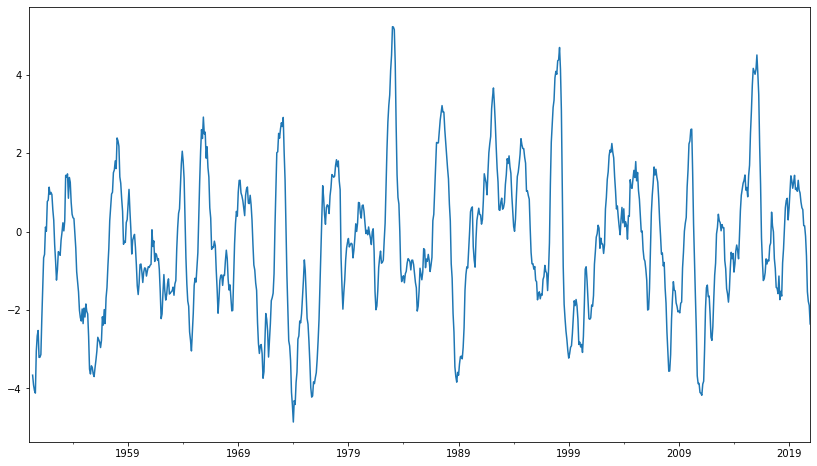

In [56]:
f, ax = plt.subplots(figsize=(14, 8))
data.CEI.plot(ax=ax)

### defines the categories below: 'CEI NINA', 'NINO3.4 NINA', 'Neutral', 'NINO3.4 NINO',        'SOI NINO', 'CEI NINO', 'SOI NINA'

In [57]:
data['category'] = 'Neutral'

In [58]:
data.head()

,soi3m,nino5m,CEI,category
1950-01-01,NaN,NaN,NaN,Neutral
1950-02-01,NaN,NaN,NaN,Neutral
1950-03-01,1.532001,NaN,NaN,Neutral
1950-04-01,1.914636,NaN,NaN,Neutral
1950-05-01,1.734800,-1.928042,-3.662842,Neutral


#### if the CEI is not defined, set to NaN

In [59]:
data.loc[pd.isnull(data.CEI).values.flatten(),'category'] = np.nan

#### Now populates everything according to the thresholds

In [60]:
data.dropna(inplace=True)

In [61]:
data.head()

,soi3m,nino5m,CEI,category
1950-05-01,1.734800,-1.928042,-3.662842,Neutral
1950-06-01,2.189922,-1.721990,-3.911912,Neutral
1950-07-01,2.518664,-1.534462,-4.053126,Neutral
1950-08-01,2.682265,-1.437348,-4.119612,Neutral
1950-09-01,1.718087,-1.332745,-3.050832,Neutral


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 848 entries, 1950-05-01 to 2020-12-01
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   soi3m     848 non-null    float64
 1   nino5m    848 non-null    float64
 2   CEI       848 non-null    float64
 3   category  848 non-null    object 
dtypes: float64(3), object(1)
memory usage: 33.1+ KB


In [63]:
data.head()

,soi3m,nino5m,CEI,category
1950-05-01,1.734800,-1.928042,-3.662842,Neutral
1950-06-01,2.189922,-1.721990,-3.911912,Neutral
1950-07-01,2.518664,-1.534462,-4.053126,Neutral
1950-08-01,2.682265,-1.437348,-4.119612,Neutral
1950-09-01,1.718087,-1.332745,-3.050832,Neutral


In [64]:
data.columns = ['soi3m', 'nino5m', 'CEI', 'category']

In [65]:
data.loc[((data.soi3m >= +1) & (data.nino5m <= -0.5)),'category'] = 'CEI NINA'
data.loc[((data.soi3m >= +1) & (data.nino5m < 0.5) & ( data.nino5m > -0.5)), 'category'] = 'SOI NINA'
data.loc[((data.nino5m <= -0.5) & (data.soi3m > -1) & ( data.soi3m < 1)), 'category'] = 'NINO3.4 NINA'
data.loc[((data.nino5m >= 0.5) & (data.soi3m < 1) & ( data.soi3m > -1)), 'category'] = 'NINO3.4 NINO'
data.loc[((data.soi3m <= -1) & (data.nino5m < 0.5) & ( data.nino5m > -0.5)), 'category'] = 'SOI NINO'
data.loc[((data.soi3m <= -1) & (data.nino5m >= 0.5)), 'category'] = 'CEI NINO'

In [66]:
data['code'] = 0
data.loc[pd.isnull(data.CEI),'code'] = np.nan

In [67]:
data.loc[((data.soi3m >= +1) & (data.nino5m <= -0.5)),'code'] = -3
data.loc[((data.soi3m >= +1) & (data.nino5m < 0.5) & ( data.nino5m > -0.5)), 'code'] = -2
data.loc[((data.nino5m <= -0.5) & (data.soi3m > -1) & ( data.soi3m < 1)), 'code'] = -1
data.loc[((data.nino5m >= 0.5) & (data.soi3m < 1) & ( data.soi3m > -1)), 'code'] = 1
data.loc[((data.soi3m <= -1) & (data.nino5m < 0.5) & ( data.nino5m > -0.5)), 'code'] = 2
data.loc[((data.soi3m <= -1) & (data.nino5m >= 0.5)), 'code'] = 3

In [68]:
data.head()

,soi3m,nino5m,CEI,category,code
1950-05-01,1.734800,-1.928042,-3.662842,CEI NINA,-3.0
1950-06-01,2.189922,-1.721990,-3.911912,CEI NINA,-3.0
1950-07-01,2.518664,-1.534462,-4.053126,CEI NINA,-3.0
1950-08-01,2.682265,-1.437348,-4.119612,CEI NINA,-3.0
1950-09-01,1.718087,-1.332745,-3.050832,CEI NINA,-3.0


In [69]:
# pd.value_counts(data[['category']])

In [70]:
from matplotlib import style; style.use('ggplot')

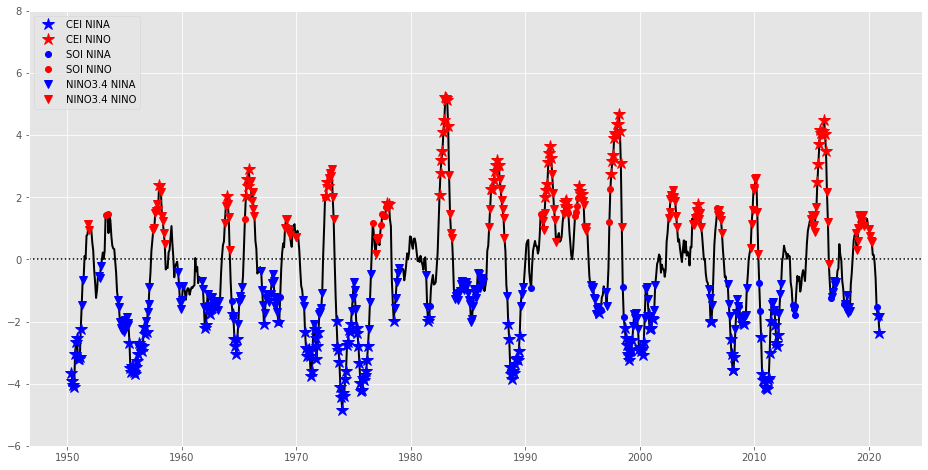

In [71]:
f, ax = plt.subplots(figsize=(16,8))
ax.plot(data.index, data.CEI, 'k-', lw=2)

ax.plot(data.index[data['category'] == 'CEI NINA'], data.CEI[data['category'] == 'CEI NINA'], 'b*', markersize=12, label='CEI NINA')
ax.plot(data.index[data['category'] == 'CEI NINO'], data.CEI[data['category'] == 'CEI NINO'], 'r*',  markersize=12, label = 'CEI NINO')

ax.plot(data.index[data['category'] == 'SOI NINA'], data.CEI[data['category'] == 'SOI NINA'], 'bo', label='SOI NINA')
ax.plot(data.index[data['category'] == 'SOI NINO'], data.CEI[data['category'] == 'SOI NINO'], 'ro', label='SOI NINO')

ax.plot(data.index[data['category'] == 'NINO3.4 NINA'], data.CEI[data['category'] == 'NINO3.4 NINA'], 'bv', markersize=8, label='NINO3.4 NINA')
ax.plot(data.index[data['category'] == 'NINO3.4 NINO'], data.CEI[data['category'] == 'NINO3.4 NINO'], 'rv', markersize=8, label='NINO3.4 NINO')

ax.axhline(0, color='k', ls=':')

ax.legend(loc='upper left')

ax.grid(color='w')

bounds = ax.get_xlim()

ax.set_xlim((bounds[0] - 60, bounds[1] + 60))

ax.set_ylim(-6, 8);

In [72]:
data.index.name = 'ISOdate'

In [73]:
data['Year'] = data.index.year
data['Month'] = data.index.month

In [74]:
data = data[['Year','Month','soi3m','nino5m','CEI','category','code']]

In [75]:
data.tail()

,Year,Month,soi3m,nino5m,CEI,category,code
ISOdate,,,,,,,
2020-08-01,2020,8,0.466059,-0.160359,-0.626418,Neutral,0.0
2020-09-01,2020,9,1.064589,-0.469595,-1.534184,SOI NINA,-2.0
2020-10-01,2020,10,1.060964,-0.720500,-1.781464,CEI NINA,-3.0
2020-11-01,2020,11,0.896138,-0.989298,-1.885436,NINO3.4 NINA,-1.0
2020-12-01,2020,12,1.141955,-1.214505,-2.356460,CEI NINA,-3.0


In [76]:
datas = data.loc['2017':,:]

Text(0.5, 1.0, 'CEI')

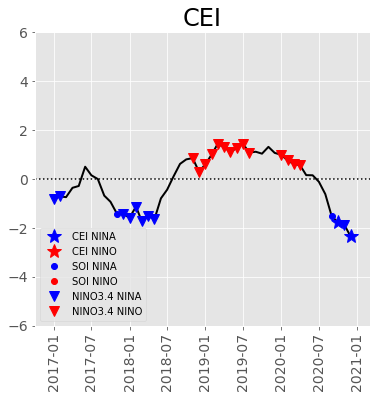

In [77]:
f, ax = plt.subplots(figsize=(6,6))

f.subplots_adjust(bottom=0.2)

ax.plot(datas.index, datas.CEI, 'k-', lw=2)

ax.plot(datas.index[datas['category'] == 'CEI NINA'], datas.CEI[datas['category'] == 'CEI NINA'], 'b*', markersize=15, label='CEI NINA')
ax.plot(datas.index[datas['category'] == 'CEI NINO'], datas.CEI[datas['category'] == 'CEI NINO'], 'r*',  markersize=15, label = 'CEI NINO')

ax.plot(datas.index[datas['category'] == 'SOI NINA'], datas.CEI[datas['category'] == 'SOI NINA'], 'bo', label='SOI NINA')
ax.plot(datas.index[datas['category'] == 'SOI NINO'], datas.CEI[datas['category'] == 'SOI NINO'], 'ro', label='SOI NINO')

ax.plot(datas.index[datas['category'] == 'NINO3.4 NINA'], datas.CEI[datas['category'] == 'NINO3.4 NINA'], 'bv', markersize=10, label='NINO3.4 NINA')
ax.plot(datas.index[datas['category'] == 'NINO3.4 NINO'], datas.CEI[datas['category'] == 'NINO3.4 NINO'], 'rv', markersize=10, label='NINO3.4 NINO')

ax.axhline(0, color='k', ls=':')

ax.legend(loc=3)

[l.set_rotation(90) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(14) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(14) for l in ax.yaxis.get_ticklabels()]

bounds = ax.get_xlim()

ax.set_xlim((bounds[0] - 20, bounds[1] + 20))

ax.grid(color='w')

# ax.axvline('2017-1-1', color='k', zorder=0)

ax.set_ylim(-6, 6)

ax.set_title('CEI', fontsize=24)

In [79]:
data.to_csv('./CEI_updated_2020-12.csv')

In [80]:
data.tail()

,Year,Month,soi3m,nino5m,CEI,category,code
ISOdate,,,,,,,
2020-08-01,2020,8,0.466059,-0.160359,-0.626418,Neutral,0.0
2020-09-01,2020,9,1.064589,-0.469595,-1.534184,SOI NINA,-2.0
2020-10-01,2020,10,1.060964,-0.720500,-1.781464,CEI NINA,-3.0
2020-11-01,2020,11,0.896138,-0.989298,-1.885436,NINO3.4 NINA,-1.0
2020-12-01,2020,12,1.141955,-1.214505,-2.356460,CEI NINA,-3.0


In [82]:
f.savefig('./CEI_updated_2020-12.png', dpi=200, bbox_inches='tight', facecolor='w')